## Import From Google Drive

In [1]:
import numpy as np
import nltk
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
import matplotlib.dates as mdates
%matplotlib inline  

#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
#movie_metadata = pd.read_csv('/content/gdrive/My Drive/S19 - Empirical Methods/project/cornell-movie-dialogs-corpus-new-seperator/movie_titles_metadata.txt', sep='|', header=None, names=["movie_id","movie_title","release_year","avg_rating","num_votes","genres"], encoding = "ISO-8859-1")
movie_metadata = pd.read_csv('cornell-movie-dialogs-corpus-new-seperator/movie_titles_metadata.txt', sep='|', header=None, names=["movie_id","movie_title","release_year","avg_rating","num_votes","genres"], encoding = "ISO-8859-1")

In [3]:
movie_metadata.head()

,movie_id,movie_title,release_year,avg_rating,num_votes,genres
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


In [4]:
#character_metadata = pd.read_csv('/content/gdrive/My Drive/S19 - Empirical Methods/project/cornell-movie-dialogs-corpus-new-seperator/movie_characters_metadata.txt', sep='|', header=None, names=["character_id","character_name","movie_id","movie_title","gender","position"], encoding = "ISO-8859-1")
character_metadata = pd.read_csv('cornell-movie-dialogs-corpus-new-seperator/movie_characters_metadata.txt', sep='|', header=None, names=["character_id","character_name","movie_id","movie_title","gender","position"], encoding = "ISO-8859-1")

In [5]:
character_metadata.head()

,character_id,character_name,movie_id,movie_title,gender,position
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [6]:
#movie_conversations_data = pd.read_csv('/content/gdrive/My Drive/S19 - Empirical Methods/project/cornell-movie-dialogs-corpus-new-seperator/movie_conversations.txt', sep='|', header=None, names=["char1_id","char2_id","movie_id","lines"], encoding = "ISO-8859-1")
movie_conversations_data = pd.read_csv('cornell-movie-dialogs-corpus-new-seperator/movie_conversations.txt', sep='|', header=None, names=["char1_id","char2_id","movie_id","lines"], encoding = "ISO-8859-1")


In [7]:
movie_conversations_data.head()

,char1_id,char2_id,movie_id,lines
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']"
1,u0,u2,m0,"['L198', 'L199']"
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']"
3,u0,u2,m0,"['L204', 'L205', 'L206']"
4,u0,u2,m0,"['L207', 'L208']"


In [8]:
#movie_lines = pd.read_excel('/content/gdrive/My Drive/S19 - Empirical Methods/project/cornell-movie-dialogs-corpus-new-seperator/liwc_results_movie_line.xlsx')
movie_lines = pd.read_excel('cornell-movie-dialogs-corpus-new-seperator/liwc_results_movie_line.xlsx')

In [9]:
movie_lines['line_id'] = movie_lines['line_id'].str.strip()
movie_lines['user_id'] = movie_lines['user_id'].str.strip()
movie_lines['movie_id'] = movie_lines['movie_id'].str.strip()
movie_lines.head()

,line_id,user_id,movie_id,characher_name,line_text,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,L229891,u1036,m68,ALEXANDER,"By Grabthar's Hammer, this is true. 159 NT. L...",13,42.69,50.00,63.54,99.00,...,7.69,0.0,0.0,0.00,0.0,15.38,0.0,7.69,0.0,0.0
1,L1000,u11,m0,WALTER,"Oh, Christ. Don't tell me you've changed you...",15,3.09,97.69,98.01,25.77,...,6.67,0.0,0.0,0.00,0.0,0.00,0.0,20.00,0.0,0.0
2,L10000,u3525,m232,LINDSEY,"Oh... chamber runs. Uh huh, that's good. We...",14,28.22,99.00,13.15,99.00,...,14.29,0.0,0.0,7.14,0.0,0.00,0.0,7.14,0.0,0.0
3,L100000,u4168,m278,JOANNE,No.,1,1.00,1.00,1.00,25.77,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
4,L100001,u4166,m278,DULANEY,Then why did you go see Mr. Koehler in the fi...,12,60.80,95.20,99.00,25.77,...,0.00,0.0,0.0,8.33,0.0,0.00,0.0,0.00,0.0,0.0


## Explore dataset

In [10]:
character_metadata.query('gender == "f"|gender == "F"').describe()

,character_id,character_name,movie_id,movie_title,gender,position
count,966,966,966,966,966,966
unique,966,611,527,527,2,44
top,u5435,MARY,m244,the anniversary party,f,2
freq,1,11,7,7,921,211


In [11]:
character_metadata.query('gender == "m"|gender == "M"').describe()

,character_id,character_name,movie_id,movie_title,gender,position
count,2049,2049,2049,2049,2049,2049
unique,2049,1380,592,592,2,49
top,u921,JACK,m428,magnolia,m,1
freq,1,17,12,12,1899,408


In [12]:
# Get only female and male characters
f_m_chars = character_metadata.loc[(character_metadata['gender'] != '?')]

In [13]:
# Get only female and male dialogues
f_m_dialogues = movie_conversations_data.loc[(movie_conversations_data['char1_id'].isin(f_m_chars['character_id'])) & (movie_conversations_data['char2_id'].isin(f_m_chars['character_id'])) ]

In [14]:
f_m_dialogues.describe()

,char1_id,char2_id,movie_id,lines
count,52038,52038,52038,52038
unique,1919,1908,591,52038
top,u1469,u603,m435,"['L235265', 'L235266', 'L235267', 'L235268', '..."
freq,180,169,264,1


In [15]:
# female-female Dialogues
f_f = f_m_dialogues.loc[(f_m_dialogues['char1_id'].isin(f_m_chars.query('gender == "f"|gender == "F"')['character_id']))
                         & (f_m_dialogues['char2_id'].isin(f_m_chars.query('gender == "f"|gender == "F"')['character_id']))]

In [16]:
f_f.describe()

,char1_id,char2_id,movie_id,lines
count,3134,3134,3134,3134
unique,186,193,139,3134
top,u3261,u7885,m533,"['L549925', 'L549926']"
freq,100,108,149,1


In [17]:
# Male-Male Dialogues
m_m = f_m_dialogues.loc[(f_m_dialogues['char1_id'].isin(f_m_chars.query('gender == "m"|gender == "M"')['character_id']))
                         & (f_m_dialogues['char2_id'].isin(f_m_chars.query('gender == "m"|gender == "M"')['character_id']))]

In [18]:
m_m.describe()

,char1_id,char2_id,movie_id,lines
count,23321,23321,23321,23321
unique,1072,1073,499,23321
top,u1469,u603,m38,"['L663986', 'L663987']"
freq,166,169,228,1


In [19]:
# Female-Male Dialogues
f_m = f_m_dialogues.loc[(~((f_m_dialogues['char1_id'].isin(f_m_chars.query('gender == "m"|gender == "M"')['character_id']))
                         & (f_m_dialogues['char2_id'].isin(f_m_chars.query('gender == "m"|gender == "M"')['character_id'])))) &
                        (~((f_m_dialogues['char1_id'].isin(f_m_chars.query('gender == "f"|gender == "F"')['character_id']))
                         & (f_m_dialogues['char2_id'].isin(f_m_chars.query('gender == "f"|gender == "F"')['character_id']))))]

In [20]:
f_m.describe()

,char1_id,char2_id,movie_id,lines
count,25583,25583,25583,25583
unique,1127,1118,516,25583
top,u5064,u5065,m513,"['L119892', 'L119893', 'L119894', 'L119895']"
freq,152,152,176,1


In [21]:
#extract lines from female female dialogues
f_f_lines = np.concatenate(f_f['lines'].apply(literal_eval).values.tolist()).ravel().tolist()
f_f_movie_lines = movie_lines.loc[(movie_lines['line_id'].isin(f_f_lines))]
f_f_movie_lines.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.00000,12015.000000,12015.000000,...,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000
mean,10.244777,30.500740,60.525974,43.173977,38.752749,5.762879,9.986858,90.64697,56.300970,24.888806,...,4.899692,0.089799,0.015551,7.883777,2.672215,1.649602,0.162382,7.736930,0.003121,0.545426
std,10.976840,36.869335,37.439085,42.402068,33.258170,4.048045,15.200863,16.82702,23.879838,17.996590,...,9.504723,1.910218,0.447964,19.046851,12.861212,9.745607,1.884680,11.122287,0.254987,5.624951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,29.920000,1.000000,25.770000,3.000000,0.000000,86.67000,50.000000,14.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,8.190000,50.000000,23.510000,25.770000,5.000000,4.170000,100.00000,60.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,60.800000,99.000000,98.010000,25.770000,7.330000,15.380000,100.00000,69.230000,33.330000,...,7.140000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000
max,177.000000,99.000000,99.000000,99.000000,99.000000,46.000000,100.000000,100.00000,100.000000,100.000000,...,83.330000,50.000000,33.330000,400.000000,300.000000,400.000000,66.670000,100.000000,25.000000,125.000000


In [22]:
#extract lines from male male dialogues
m_m_lines = np.concatenate(m_m['lines'].apply(literal_eval).values.tolist()).ravel().tolist()
m_m_movie_lines = movie_lines.loc[(movie_lines['line_id'].isin(m_m_lines))]
m_m_movie_lines.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,...,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000
mean,11.065641,36.177231,61.846043,42.900946,35.944758,5.964886,10.671154,88.155855,54.512866,23.574583,...,5.223856,0.117205,0.031264,7.686827,2.480406,2.886189,0.209465,7.335433,0.001585,0.590779
std,12.980364,38.391939,36.449007,41.888608,31.464460,4.323803,15.570852,18.331890,23.273101,17.788604,...,9.478496,2.097451,0.541200,18.378318,12.529175,16.382031,2.458999,11.241788,0.179721,6.293191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,50.000000,1.000000,25.770000,3.000000,0.000000,83.330000,45.830000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,17.960000,50.000000,23.510000,25.770000,5.000000,5.710000,94.640000,57.140000,22.860000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,78.350000,99.000000,94.810000,25.770000,7.800000,16.670000,100.000000,66.670000,33.330000,...,7.690000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
max,571.000000,99.000000,99.000000,99.000000,99.000000,106.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,50.000000,33.330000,500.000000,500.000000,1875.000000,100.000000,200.000000,33.330000,400.000000


In [23]:
#extract lines from female male dialogues
f_m_lines = np.concatenate(f_m['lines'].apply(literal_eval).values.tolist()).ravel().tolist()
f_m_movie_lines = movie_lines.loc[(movie_lines['line_id'].isin(f_m_lines))]
f_m_movie_lines.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,...,100931.000000,100931.000000,100931.000000,100931.000000,100931.00000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000
mean,10.212056,31.916431,59.707935,45.541131,38.667448,5.661615,10.284361,90.175495,56.424169,24.818220,...,4.635572,0.121380,0.019602,8.320317,2.24763,3.054693,0.186135,7.554145,0.001934,0.682079
std,11.750777,37.536085,37.224144,42.697612,32.749896,4.136008,15.716323,17.586986,23.994849,18.172113,...,9.151952,2.250112,0.456337,19.233494,13.36582,20.799960,2.444615,11.454515,0.330726,6.887315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,29.920000,1.000000,25.770000,3.000000,0.000000,85.710000,50.000000,13.640000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,8.190000,50.000000,37.240000,25.770000,5.000000,4.170000,100.000000,60.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,67.140000,99.000000,98.010000,25.770000,7.000000,16.670000,100.000000,70.000000,33.330000,...,6.670000,0.000000,0.000000,8.570000,0.00000,0.000000,0.000000,12.500000,0.000000,0.000000
max,479.000000,99.000000,99.000000,99.000000,99.000000,87.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,50.000000,33.330000,400.000000,1600.00000,3750.000000,100.000000,200.000000,100.000000,200.000000


In [24]:
# The first aspect is when two female characters are talking to each other, they will be talking about something other than men.  
# Here we will measure the men words in their dialogue and see how it change with time. 
f_m_male_words = f_m_movie_lines[['male','movie_id']].groupby('movie_id',as_index=False).mean()
m_m_male_words= m_m_movie_lines[['male','movie_id']].groupby('movie_id',as_index=False).mean()
f_f_male_words = f_f_movie_lines[['male','movie_id']].groupby('movie_id',as_index=False).mean()

In [25]:
f_m_male_words.describe()

,male
count,516.000000
mean,1.933456
std,1.165527
min,0.000000
25%,1.102542
50%,1.719781
75%,2.492468
max,7.304783


In [26]:
f_m_movies = movie_metadata[['movie_id','release_year','genres']].loc[movie_metadata['movie_id'].isin(f_m_male_words['movie_id'])].set_index('movie_id')
m_m_movies = movie_metadata[['movie_id','release_year','genres']].loc[movie_metadata['movie_id'].isin(m_m_male_words['movie_id'])].set_index('movie_id')
f_f_movies = movie_metadata[['movie_id','release_year','genres']].loc[movie_metadata['movie_id'].isin(f_f_male_words['movie_id'])].set_index('movie_id')
f_m_male_words = f_m_male_words.set_index('movie_id')
m_m_male_words= m_m_male_words.set_index('movie_id')
f_f_male_words = f_f_male_words.set_index('movie_id')
f_m_movies.describe()
m_m_movies.describe()
f_f_movies.describe()

,release_year
count,139.000000
mean,1986.438849
std,21.097811
min,1931.000000
25%,1986.000000
50%,1995.000000
75%,1999.000000
max,2007.000000


In [27]:
f_m_merged_male_genre_year = pd.concat([f_m_male_words, f_m_movies], axis=1, join="inner")
m_m_merged_male_genre_year = pd.concat([m_m_male_words, m_m_movies], axis=1, join="inner")
f_f_merged_male_genre_year = pd.concat([f_f_male_words, f_f_movies], axis=1, join="inner")

In [28]:
f_f_merged_male_genre_year

,male,release_year,genres
movie_id,,,
m0,3.009412,1999,"['comedy', 'romance']"
m102,3.516607,2003,"['comedy', 'romance', 'crime']"
m103,5.410100,1934,"['comedy', 'romance']"
m105,3.138750,1997,"['crime', 'drama', 'thriller']"
m109,1.435358,2007,"['comedy', 'drama']"
m110,1.893333,1993,"['crime', 'drama', 'thriller']"
m111,2.850256,1995,"['crime', 'drama']"
m117,2.559623,2001,['comedy']
m119,10.556667,2001,"['drama', 'romance']"


In [29]:
# Modify Plots (add all datasets in one plot with 3 different colors)
#m_m_merged_male_genre_year.plot(x="release_year", y="male",title="M-M")
#f_m_merged_male_genre_year.plot(x="release_year", y="male",title="F-M")
#f_f_merged_male_genre_year.plot(x="release_year", y="male",title="F-F")

In [30]:
# LDA"
# Group movies by 10 years period, analyze F-F movies, (3,5,10 topics) per period.
f_m_merged_male_genre_year.groupby((f_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).count()

,male,release_year,genres
release_year,,,
1930,14,14,14
1940,15,15,15
1950,14,14,14
1960,14,14,14
1970,39,39,39
1980,92,92,92
1990,202,202,202
2000,125,125,125
2010,1,1,1


In [31]:
f_f_merged_male_genre_year.groupby((f_f_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).count()

,male,release_year,genres
release_year,,,
1930,11,11,11
1940,7,7,7
1950,2,2,2
1960,3,3,3
1970,4,4,4
1980,23,23,23
1990,55,55,55
2000,34,34,34


In [32]:
m_m_merged_male_genre_year.groupby((m_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).count()

,male,release_year,genres
release_year,,,
1930,14,14,14
1940,13,13,13
1950,14,14,14
1960,14,14,14
1970,46,46,46
1980,83,83,83
1990,205,205,205
2000,110,110,110


In [33]:
f_m_movie_lines.head()

,line_id,user_id,movie_id,characher_name,line_text,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,L229891,u1036,m68,ALEXANDER,"By Grabthar's Hammer, this is true. 159 NT. L...",13,42.69,50.00,63.54,99.00,...,7.69,0.0,0.0,0.00,0.0,15.38,0.0,7.69,0.0,0.0
1,L1000,u11,m0,WALTER,"Oh, Christ. Don't tell me you've changed you...",15,3.09,97.69,98.01,25.77,...,6.67,0.0,0.0,0.00,0.0,0.00,0.0,20.00,0.0,0.0
3,L100000,u4168,m278,JOANNE,No.,1,1.00,1.00,1.00,25.77,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
4,L100001,u4166,m278,DULANEY,Then why did you go see Mr. Koehler in the fi...,12,60.80,95.20,99.00,25.77,...,0.00,0.0,0.0,8.33,0.0,0.00,0.0,0.00,0.0,0.0
5,L100002,u4168,m278,JOANNE,Because he called me.,4,1.00,99.00,1.00,25.77,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0


In [34]:
def divide_10(d):
    return d//10

In [35]:
# SELECT linte_text from movie_lines when movie_id in (SELECT movie_id from movie_metadata when year.str.split(0,3)=="200")
f_f_lines_1930 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
                                   .loc[movie_metadata['release_year'].apply(divide_10)==193])]
f_f_lines_1940 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
                                   .loc[movie_metadata['release_year'].apply(divide_10)==194])]
f_f_lines_1950 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
                                   .loc[movie_metadata['release_year'].apply(divide_10)==195])]
f_f_lines_1960 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
                                   .loc[movie_metadata['release_year'].apply(divide_10)==196])]
f_f_lines_1970 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
                                   .loc[movie_metadata['release_year'].apply(divide_10)==197])]
f_f_lines_1980 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
                                   .loc[movie_metadata['release_year'].apply(divide_10)==198])]
f_f_lines_1990 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
                                   .loc[movie_metadata['release_year'].apply(divide_10)==199])]
f_f_lines_2000 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
                                   .loc[movie_metadata['release_year'].apply(divide_10)==200])]
#There is only one movie in 2010 
#f_f_lines_2010 = f_f_movie_lines[['line_text']].loc[f_f_movie_lines['movie_id'].isin(movie_metadata['movie_id']
#                                   .loc[movie_metadata['release_year'].apply(divide_10)==201])]

In [36]:
f_f_lines_2000

,line_text
3548,What kind of problems?
3549,Depression. Anger. Compulsive behaviors. They...
3550,Amnesia?
3551,Before this? Before Bourne? No.
3552,Good luck.
3553,You were his local contact. You were with him...
3554,I'm curious about Bourne. Your interpretation...
3555,"Am I a doctor, no, but..."
3556,Are you an expert in amnesia?
3557,"Look, what do you want me to say? I was there..."


In [37]:
import nltk; nltk.download('stopwords')
import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /Users/amal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [39]:
# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(df.target_names.unique())
df.head()

['rec.autos' 'comp.sys.mac.hardware' 'rec.motorcycles' 'misc.forsale'
 'comp.os.ms-windows.misc' 'alt.atheism' 'comp.graphics'
 'rec.sport.baseball' 'rec.sport.hockey' 'sci.electronics' 'sci.space'
 'talk.politics.misc' 'sci.med' 'talk.politics.mideast'
 'soc.religion.christian' 'comp.windows.x' 'comp.sys.ibm.pc.hardware'
 'talk.politics.guns' 'talk.religion.misc' 'sci.crypt']


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles
100,From: tchen@magnus.acs.ohio-state.edu (Tsung-K...,6,misc.forsale
1000,From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)\n...,2,comp.os.ms-windows.misc


In [40]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def clean_text(movie_lines):
    # Convert to list
    data = movie_lines.line_text.values.tolist()

    # Remove Emails
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]

    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]
    
    pprint(data[:1])
    
    data_words = list(sent_to_words(data))
    pprint(data_words[:1])
    
    return data_words

In [41]:
f_f_1930_words = clean_text(f_f_lines_1930)
f_f_1940_words = clean_text(f_f_lines_1940)
f_f_1950_words = clean_text(f_f_lines_1950)
f_f_1960_words = clean_text(f_f_lines_1960)
f_f_1970_words = clean_text(f_f_lines_1970)
f_f_1980_words = clean_text(f_f_lines_1980)
f_f_1990_words = clean_text(f_f_lines_1990)
f_f_2000_words = clean_text(f_f_lines_2000)
movie_words = clean_text(movie_lines[['line_text']])

[' Always the performance -- every day the performance -- time for the '
 'performance. I think, Suzette, I have never been so tired in my life. '
 'Veronal didnt even help me to sleep. ']
[['always',
  'the',
  'performance',
  'every',
  'day',
  'the',
  'performance',
  'time',
  'for',
  'the',
  'performance',
  'think',
  'suzette',
  'have',
  'never',
  'been',
  'so',
  'tired',
  'in',
  'my',
  'life',
  'veronal',
  'didnt',
  'even',
  'help',
  'me',
  'to',
  'sleep']]
[' What do you expect me to do? What in the world -']
[['what',
  'do',
  'you',
  'expect',
  'me',
  'to',
  'do',
  'what',
  'in',
  'the',
  'world']]
[' So there you are. It seemed odd, suddenly, your not being there...']
[['so',
  'there',
  'you',
  'are',
  'it',
  'seemed',
  'odd',
  'suddenly',
  'your',
  'not',
  'being',
  'there']]
[' Well, with a shark running loose around the place, I for one wont get '
 'aboard that raft! Theyll have to catch it first. I want to see it right here '
 'be

In [42]:
def lda(data_words):
    # Define functions for stopwords, bigrams, trigrams and lemmatization
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    # See trigram example
    print(trigram_mod[bigram_mod[data_words[0]]])
    
    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops)

    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    # python3 -m spacy download en
    nlp = spacy.load('en', disable=['parser', 'ner'])

    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    print(data_lemmatized[:1])
    
    # Create Dictionary
    id2word = corpora.Dictionary(data_lemmatized)

    # Create Corpus
    texts = data_lemmatized

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    # View
    print(corpus[:1])

    return corpus, id2word, data_lemmatized

In [43]:
corpus_1930, id2word_1930, lemmatized_1930 = lda(f_f_1930_words)
corpus_1940, id2word_1940, lemmatized_1940 = lda(f_f_1940_words)
corpus_1950, id2word_1950, lemmatized_1950 = lda(f_f_1950_words)
corpus_1960, id2word_1960, lemmatized_1960 = lda(f_f_1960_words)
corpus_1970, id2word_1970, lemmatized_1970 = lda(f_f_1970_words)
corpus_1980, id2word_1980, lemmatized_1980 = lda(f_f_1980_words)
corpus_1990, id2word_1990, lemmatized_1990 = lda(f_f_1990_words)
corpus_2000, id2word_2000, lemmatized_2000 = lda(f_f_2000_words)
corpus_movies, id2words_movies, lemmatized_movies = lda(movie_words)

['always', 'the', 'performance', 'every', 'day', 'the', 'performance', 'time', 'for', 'the', 'performance', 'think', 'suzette', 'have', 'never', 'been', 'so', 'tired', 'in', 'my', 'life', 'veronal', 'didnt', 'even', 'help', 'me', 'to', 'sleep']
[['always', 'performance', 'day', 'performance', 'time', 'performance', 'think', 'suzette', 'never', 'tired', 'life', 'veronal', 'do', 'not', 'even', 'help', 'sleep']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]
['what', 'do', 'you', 'expect', 'me', 'to', 'do', 'what', 'in', 'the', 'world']
[['expect', 'world']]
[[(0, 1), (1, 1)]]
['so', 'there', 'you', 'are', 'it', 'seemed', 'odd', 'suddenly', 'your', 'not', 'being', 'there']
[['seem', 'odd', 'suddenly']]
[[(0, 1), (1, 1), (2, 1)]]
['well', 'with', 'shark', 'running', 'loose', 'around', 'the', 'place', 'for', 'one', 'wont', 'get', 'aboard', 'that', 'raft', 'theyll', 'have', 'to', 'catch', 'it', 'first', 'want', 

In [44]:
def compute_coherence_values(id2word, corpus, texts, limit, start=3, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
lda_models, coherence_values = compute_coherence_values(corpus=corpus_movies, id2word=id2words_movies, texts=lemmatized_movies, limit=30)


In [46]:
pprint(coherence_values)

[0.2203384130541426,
 0.31689072137804747,
 0.3454340602761069,
 0.3721184830999116,
 0.3753979821993093,
 0.3569134765213124,
 0.3524360829219258,
 0.3405488486467622,
 0.3338290769098034]


In [47]:
optimal_model = lda_models[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.147*"time" + 0.054*"long" + 0.046*"wait" + 0.038*"run" + 0.033*"place" + '
  '0.027*"hold" + 0.024*"year" + 0.020*"hope" + 0.016*"guess" + 0.015*"line"'),
 (1,
  '0.039*"dead" + 0.021*"doctor" + 0.018*"school" + 0.016*"death" + '
  '0.015*"body" + 0.014*"learn" + 0.012*"alive" + 0.012*"put" + 0.012*"blow" + '
  '0.012*"high"'),
 (2,
  '0.069*"leave" + 0.048*"friend" + 0.048*"girl" + 0.035*"nice" + '
  '0.033*"bring" + 0.032*"car" + 0.030*"back" + 0.024*"move" + 0.023*"baby" + '
  '0.021*"dad"'),
 (3,
  '0.167*"good" + 0.095*"thing" + 0.075*"love" + 0.050*"bad" + 0.035*"play" + '
  '0.030*"lose" + 0.028*"idea" + 0.026*"pretty" + 0.020*"hurt" + '
  '0.019*"guess"'),
 (4,
  '0.096*"call" + 0.045*"happen" + 0.041*"remember" + 0.028*"miss" + '
  '0.024*"tomorrow" + 0.023*"suppose" + 0.022*"put" + 0.021*"sound" + '
  '0.019*"easy" + 0.019*"gun"'),
 (5,
  '0.069*"fuck" + 0.039*"shit" + 0.028*"head" + 0.023*"eat" + 0.021*"sleep" + '
  '0.021*"shoot" + 0.021*"lie" + 0.020*"sit" + 0.02

In [48]:
for t in range(3, 15, 3):
    print(t)

3
6
9
12


In [49]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus_movies, texts=movie_lines[['line_text','line_id','movie_id']]):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = texts #pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [50]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_movies, texts=movie_lines[['line_text','line_id','movie_id']])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'line_text','line_id','movie_id']


In [51]:
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'line_text','line_id','movie_id']
# Show
# df_dominant_topic.groupby('Dominant_Topic').count()
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,line_text,line_id,movie_id
0,0,8.0,0.0853,"find, room, set, check, sign, record, send, co...","By Grabthar's Hammer, this is true. 159 NT. L...",L229891,m68
1,1,8.0,0.0747,"find, room, set, check, sign, record, send, co...","Oh, Christ. Don't tell me you've changed you...",L1000,m0
2,2,1.0,0.0788,"dead, doctor, school, death, body, learn, aliv...","Oh... chamber runs. Uh huh, that's good. We...",L10000,m232
3,3,0.0,0.0556,"time, long, wait, run, place, hold, year, hope...",No.,L100000,m278
4,4,13.0,0.0726,"life, people, great, live, problem, thing, poi...",Then why did you go see Mr. Koehler in the fi...,L100001,m278


In [113]:
df_dominant_topic.groupby('Dominant_Topic').count()
merged= df_dominant_topic.merge(movie_metadata, on="movie_id")
merged_g = merged.groupby([(merged['release_year'].apply(int)//10)*10,'Dominant_Topic'],as_index=True)['Document_No'].count()
merged_g.to_csv('lda_results.csv')
# Dominant topics: 0, 2, 3, 1
merged

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,line_text,line_id,movie_id,movie_title,release_year,avg_rating,num_votes,genres
0,0,8.0,0.0853,"find, room, set, check, sign, record, send, co...","By Grabthar's Hammer, this is true. 159 NT. L...",L229891,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
1,61427,8.0,0.0881,"find, room, set, check, sign, record, send, co...",Structural damage at 68 percent.,L228848,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
2,61428,8.0,0.0901,"find, room, set, check, sign, record, send, co...",We're getting major structural damage.,L228849,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
3,61429,16.0,0.1210,"day, night, year, week, hour, start, change, m...",Where the hell is he? An hour and a half lat...,L228858,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
4,61430,13.0,0.0797,"life, people, great, live, problem, thing, poi...",This is great! They're going to start eating...,L228859,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
5,61431,1.0,0.0741,"dead, doctor, school, death, body, learn, aliv...",He's a twit!,L228860,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
6,61432,6.0,0.0720,"hand, walk, read, put, close, open, eye, turn,...","Oh, and did you hear he booked another fan ap...",L228861,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
7,61433,10.0,0.0654,"boy, meet, show, father, mother, big, watch, k...",You're kidding. When for?,L228862,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
8,61434,4.0,0.0782,"call, happen, remember, miss, tomorrow, suppos...","Tomorrow morning, before the store opening.",L228863,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
9,61435,1.0,0.0726,"dead, doctor, school, death, body, learn, aliv...",He's a miserable twit!,L228864,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"


In [114]:
cc = f_f_movie_lines.merge(merged, on=["movie_id","line_id","line_text"])
#cc = cc.groupby([(cc['release_year'].apply(int)//10)*10,'Dominant_Topic'],as_index=True)['Document_No'].count()
#percentage_topics_f_f = cc/cc.sum()*100
#percentage_topics_f_f
# Second most: topic 0, 2, 3, 9
cc.to_csv('lda_results_ff.csv')

In [54]:
cc = m_m_movie_lines.merge(df_dominant_topic, on=["movie_id","line_id","line_text"]).groupby('Dominant_Topic')['line_id'].count().rename("count")
percentage_topics_m_m = cc/cc.sum()*100
percentage_topics_m_m
# second most: topic 0, 5, 1, 3

Dominant_Topic
0.0     23.007479
1.0      5.295932
2.0      5.137692
3.0      5.284548
4.0      5.154768
5.0      6.717820
6.0      4.738106
7.0      4.743798
8.0      4.175727
9.0      4.496761
10.0     4.011794
11.0     4.620849
12.0     3.777279
13.0     3.530242
14.0     4.151820
15.0     3.647499
16.0     3.197823
17.0     4.310060
Name: count, dtype: float64

In [55]:
cc= f_m_movie_lines.merge(df_dominant_topic, on=["movie_id","line_id","line_text"]).groupby('Dominant_Topic')['line_id'].count().rename("count")
percentage_topics_f_m = cc/cc.sum()*100
#second most: topic 0, 2, 3, 9

In [56]:
percentage_topics_f_m

Dominant_Topic
0.0     26.410122
1.0      5.033141
2.0      6.215137
3.0      6.122995
4.0      5.173832
5.0      4.307894
6.0      4.650702
7.0      4.093886
8.0      3.280459
9.0      5.731638
10.0     4.609089
11.0     4.238539
12.0     4.035430
13.0     3.684695
14.0     3.482577
15.0     3.255690
16.0     3.419168
17.0     2.255006
Name: count, dtype: float64

## Results of LDA analysis:

18 Topics results:
* In general all of the dialogues share the same dominent topic (0), however they differ in the subsequent topics in the list. 
* The second most dominant for the general dataset is 1 and then 2 and then 5. Which represents usual daily interactions. The F-M conversations also shared the same topic order.
* What is interesting is that m-m conversations and the f-f conversations had different topics distributions.
* for m-m it is 0,7,2,1
* for f-f it is 0, 2, 1, 10

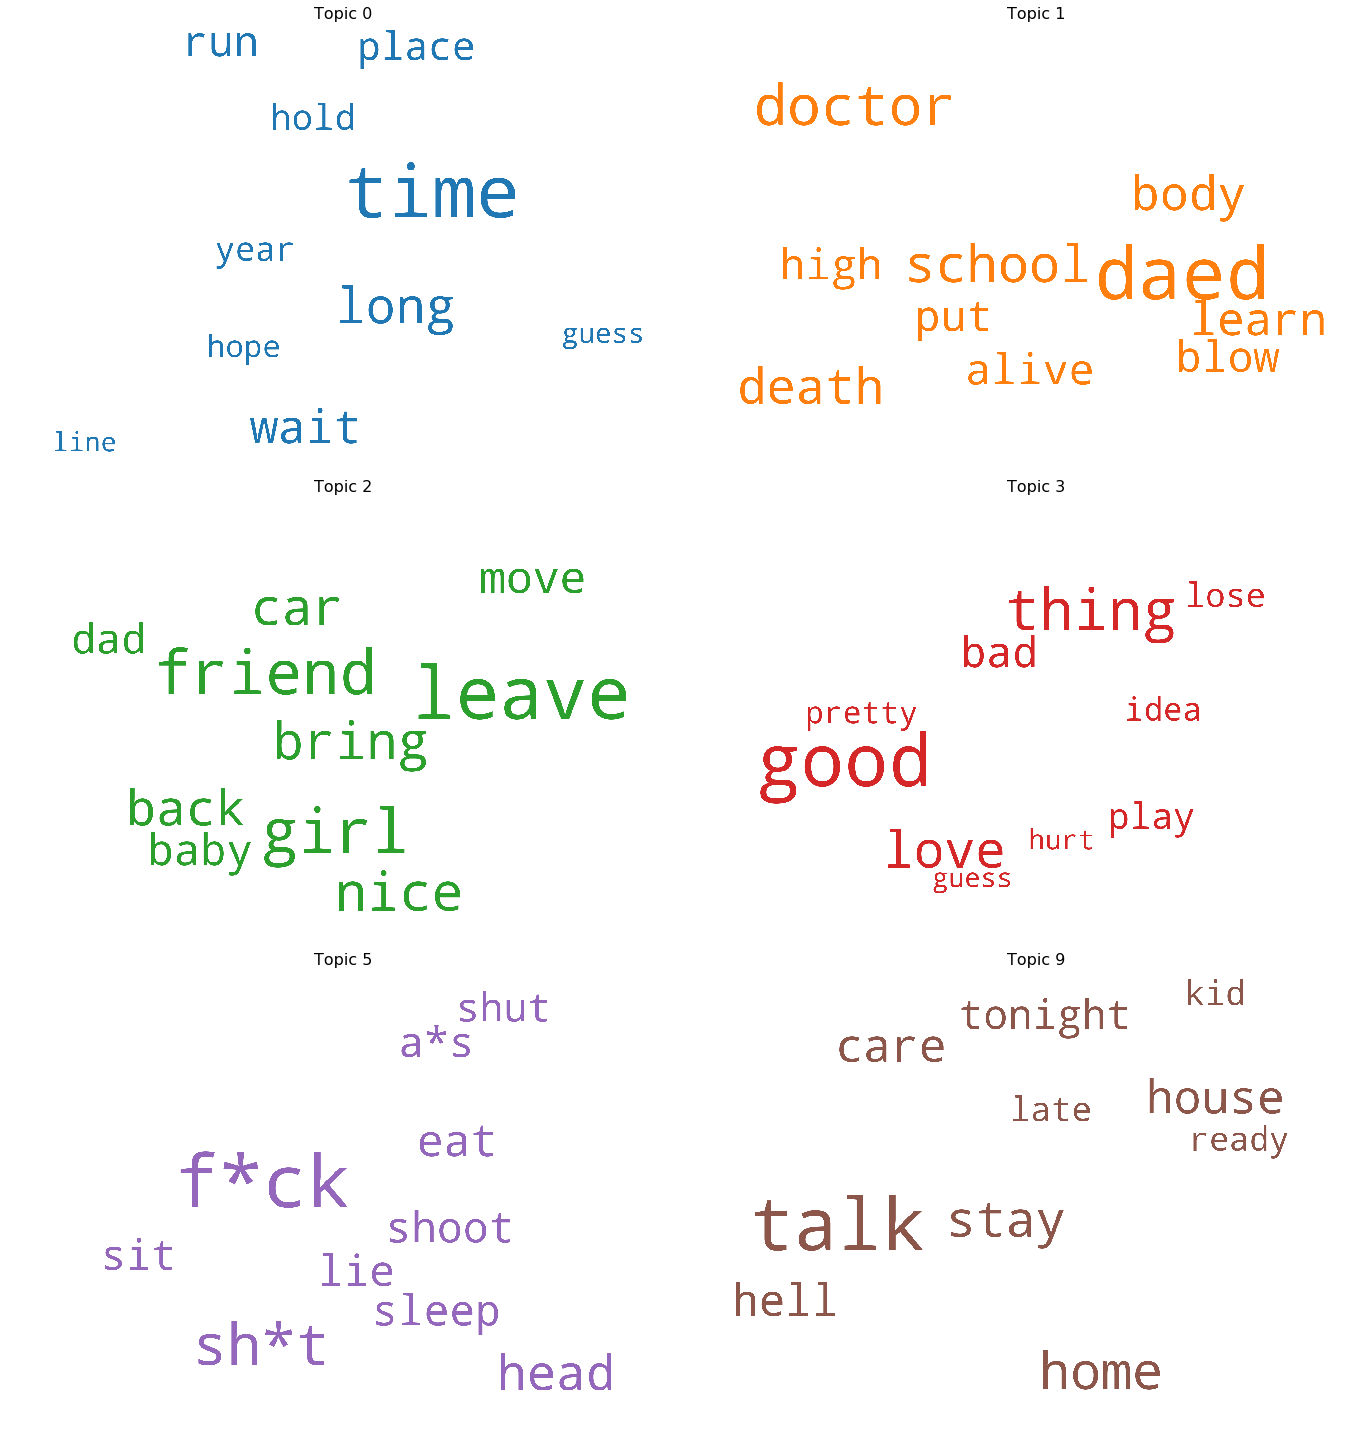

In [77]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = [(0,[
    ("time",0.147),
    ("long",0.054),
    ("wait",0.046),
    ("run",0.038),
    ("place",0.033),
    ("hold",0.027),
    ("year",0.024),
    ("hope",0.020),
    ("guess",0.016),
    ("line",0.015)]),
 (1,[ ("daed",0.039),("doctor",0.021),("school",0.018),("death",0.016),("body",0.015),("learn",0.014),
      ("alive",0.012),("put",0.012),("blow",0.012),("high",0.012)]),
(2,[("leave",0.069), ("friend",0.048), ("girl",0.048), ("nice",0.035),
  ("bring",0.033), ("car",0.032), ("back",0.030), ("move",0.024),("baby",0.023),
  ("dad",0.021)]),
 (3,[("good",0.167),("thing", 0.095), ("love",0.075),("bad", 0.050),("play",0.035),("lose",0.030), 
    ("idea",0.028),("pretty",0.026),("hurt",0.020),("guess",0.019)]),
 (5,[("f*ck",0.069),("sh*t",0.039),("head",0.028),("eat",0.023),("sleep",0.021),("shoot",0.021),("lie",0.021),("sit",0.020),
    ("a*s",0.020),("shut",0.018)]),
 (9,[("talk",0.106),("home",0.044),("stay",0.041),("care",0.035),("house",0.035),("hell",0.032)
    ,("tonight",0.027),("kid",0.018),("late",0.018),("ready",0.017)])]

fig, axes = plt.subplots(3, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(topics[i][0]), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [67]:
topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics()

[(0,
  '0.147*"time" + 0.054*"long" + 0.046*"wait" + 0.038*"run" + 0.033*"place" + 0.027*"hold" + 0.024*"year" + 0.020*"hope" + 0.016*"guess" + 0.015*"line"'),
 (1,
  '0.039*"dead" + 0.021*"doctor" + 0.018*"school" + 0.016*"death" + 0.015*"body" + 0.014*"learn" + 0.012*"alive" + 0.012*"put" + 0.012*"blow" + 0.012*"high"'),
 (2,
  '0.069*"leave" + 0.048*"friend" + 0.048*"girl" + 0.035*"nice" + 0.033*"bring" + 0.032*"car" + 0.030*"back" + 0.024*"move" + 0.023*"baby" + 0.021*"dad"'),
 (3,
  '0.167*"good" + 0.095*"thing" + 0.075*"love" + 0.050*"bad" + 0.035*"play" + 0.030*"lose" + 0.028*"idea" + 0.026*"pretty" + 0.020*"hurt" + 0.019*"guess"'),
 (4,
  '0.096*"call" + 0.045*"happen" + 0.041*"remember" + 0.028*"miss" + 0.024*"tomorrow" + 0.023*"suppose" + 0.022*"put" + 0.021*"sound" + 0.019*"easy" + 0.019*"gun"'),
 (5,
  '0.069*"fuck" + 0.039*"shit" + 0.028*"head" + 0.023*"eat" + 0.021*"sleep" + 0.021*"shoot" + 0.021*"lie" + 0.020*"sit" + 0.020*"ass" + 0.018*"shut"'),
 (6,
  '0.027*"hand" + 0

In [64]:
optimal_model.show_topics(formatted=False)

[(0,[
    ("time",0.147),
    ("long",0.054),
    ("wait",0.046),
    ("run",0.038),
    ("place",0.033),
    ("hold",0.027),
    ("year",0.024),
    ("hope",0.020),
    ("guess",0.016),
    ("line",0.015)]),
 (1,[ ("daed",0.039),("doctor",0.021),("school",0.018),("death",0.016),("body",0.015),("learn",0.014),
      ("alive",0.012),("put",0.012),("blow",0.012),("high",0.012)]),
(2,[("leave",0.069), ("friend",0.048), ("girl",0.048), ("nice",0.035),
  ("bring",0.033), ("car",0.032), ("back",0.030), ("move",0.024),("baby",0.023),
  ("dad",0.021)]),
 (3,[("good",0.167),("thing", 0.095), ("love",0.075),("bad", 0.050),("play",0.035),("lose",0.030), 
    ("idea",0.028),("pretty",0.026),("hurt",0.020),("guess",0.019)]),
 (5,[("f*ck",0.069),("sh*t",0.039),("head",0.028),("eat",0.023),("sleep",0.021),("shoot",0.021),("lie",0.021),("sit",0.020)
    ("a*s",0.020),("shut",0.018)]),
 (9,[("talk",0.106),("home",0.044),("stay",0.041),("care",0.035),("house",0.035),("hell",0.032)
    ("tonight",0.027),("kid",0.018),("late",0.018),("ready",0.017)])]

[(7,
  [('work', 0.08545269582909461),
   ('guy', 0.07437762720973531),
   ('lot', 0.040998867540643774),
   ('job', 0.03270696174590683),
   ('stuff', 0.02287951784103342),
   ('hard', 0.022572410219006123),
   ('people', 0.021171231693506595),
   ('buy', 0.020230714601048003),
   ('big', 0.01754352290830918),
   ('town', 0.017332386418165417)]),
 (4,
  [('call', 0.09564032697547684),
   ('happen', 0.044783962631374075),
   ('remember', 0.04135850525496302),
   ('miss', 0.027831841183339822),
   ('tomorrow', 0.023919813156870376),
   ('suppose', 0.022868820552744258),
   ('put', 0.021759439470611132),
   ('sound', 0.020980926430517712),
   ('easy', 0.018898404048267807),
   ('gun', 0.018528610354223433)]),
 (3,
  [('good', 0.16658630200397323),
   ('thing', 0.09512604393696839),
   ('love', 0.07529847435724343),
   ('bad', 0.05024398711593728),
   ('play', 0.03477539684070438),
   ('lose', 0.03039713001716589),
   ('idea', 0.027812602464944935),
   ('pretty', 0.02626960094123093),
   

In [60]:
optimal_model2 = lda_models[3]
model_topics2 = optimal_model2.show_topics(formatted=False)
pprint(optimal_model2.print_topics(num_words=10))

[(0,
  '0.089*"ill" + 0.069*"back" + 0.039*"night" + 0.033*"leave" + 0.030*"wait" + '
  '0.030*"day" + 0.029*"home" + 0.027*"stay" + 0.023*"house" + 0.022*"give"'),
 (1,
  '0.089*"thing" + 0.028*"girl" + 0.028*"kind" + 0.027*"understand" + '
  '0.027*"lot" + 0.024*"listen" + 0.024*"year" + 0.024*"woman" + 0.024*"man" + '
  '0.023*"time"'),
 (2,
  '0.053*"find" + 0.037*"sir" + 0.023*"place" + 0.018*"room" + 0.016*"send" + '
  '0.015*"run" + 0.014*"check" + 0.011*"town" + 0.011*"plan" + 0.010*"police"'),
 (3,
  '0.029*"kid" + 0.028*"boy" + 0.023*"play" + 0.022*"car" + 0.018*"watch" + '
  '0.017*"sit" + 0.014*"open" + 0.014*"drink" + 0.014*"face" + 0.014*"run"'),
 (4,
  '0.071*"talk" + 0.066*"time" + 0.043*"hear" + 0.036*"long" + 0.033*"happen" '
  '+ 0.028*"remember" + 0.022*"job" + 0.018*"problem" + 0.017*"word" + '
  '0.017*"forget"'),
 (5,
  '0.026*"put" + 0.024*"fine" + 0.019*"give" + 0.019*"hand" + 0.018*"hold" + '
  '0.016*"break" + 0.016*"turn" + 0.015*"read" + 0.015*"head" + '
  